<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/Multilinear_Reg_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv('train.csv')
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)      60.000   
1                 Boston                           Hitch a Ride      54.000   
2          The Raincoats                     No Side to Fall In      35.000   
3                   Deno             Lingo (feat. J.I & Chunkz)      66.000   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered      53.000   

   danceability  energy    key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564  1.000    -4.964     1        0.049         0.017   
1         0.382   0.814  3.000    -7.230     1        0.041         0.001   
2         0.434   0.614  6.000    -8.334     1        0.052         0.486   
3         0.853   0.597 10.000    -6.528     0        0.056         0.021   
4         0.167   0.975  2.000    -4.279     1        0.216         0.000   

   instrumentalness  liveness  valence   tempo  duration_in min/ms  \
0               NaN     0.085    0.899 134.071          234596.000   
1             0.004     0.101    0.569 116.454          251733.000   
2             0.000     0.394    0.787 147.681          109667.000   
3               NaN     0.122    0.569 107.033          173968.000   
4             0.016     0.172    0.092 199.060          229960.000   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [12]:
X_test.shape

(3600, 16)

In [13]:
df.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [14]:
df.dropna(inplace=True)  ## inplace=True means that we just replace original df with our new cleaned version
df.shape

(11813, 17)

In [15]:
df.to_csv('music_clean.csv', index = None, header=True)

In [35]:

X=df.drop('Class',axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11813 entries, 1 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         11813 non-null  object 
 1   Track Name          11813 non-null  object 
 2   Popularity          11813 non-null  float64
 3   danceability        11813 non-null  float64
 4   energy              11813 non-null  float64
 5   key                 11813 non-null  float64
 6   loudness            11813 non-null  float64
 7   mode                11813 non-null  int64  
 8   speechiness         11813 non-null  float64
 9   acousticness        11813 non-null  float64
 10  instrumentalness    11813 non-null  float64
 11  liveness            11813 non-null  float64
 12  valence             11813 non-null  float64
 13  tempo               11813 non-null  float64
 14  duration_in min/ms  11813 non-null  float64
 15  time_signature      11813 non-null  int64  
 16  Class    

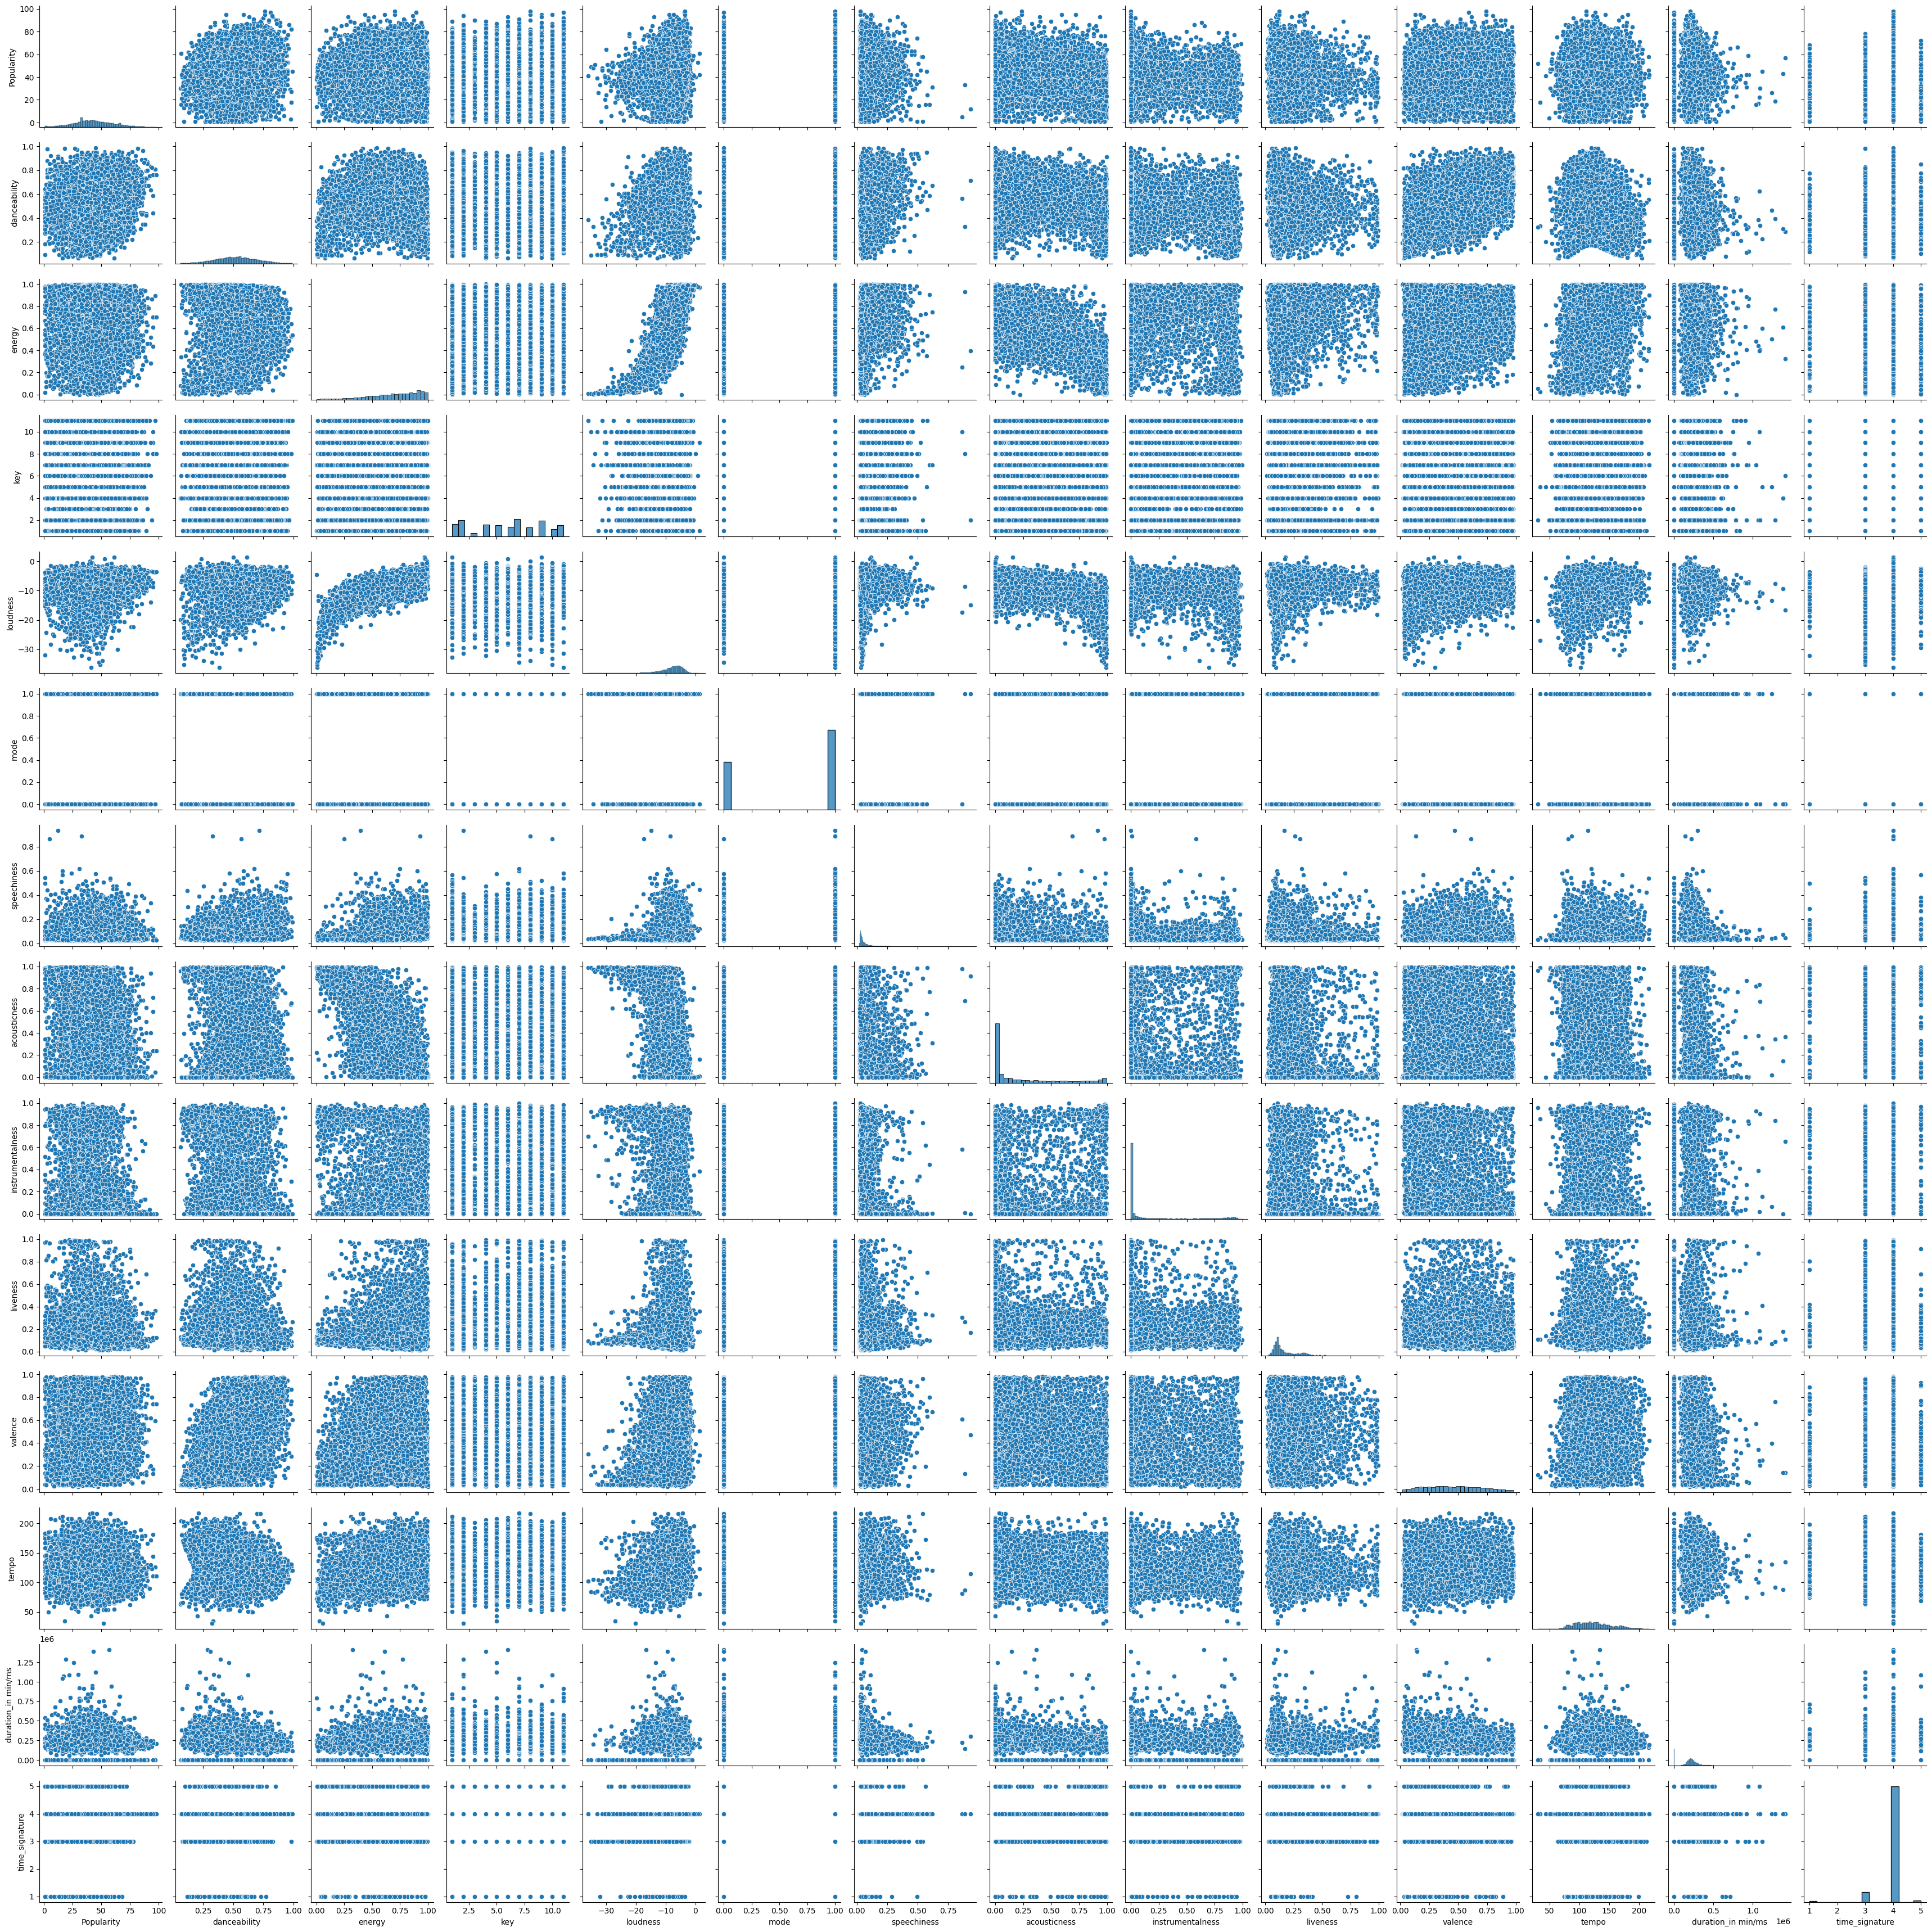

In [21]:
sns.pairplot(data=X_train, diag_kind='hist', palette='tab10')

In [37]:
xt=X_train.energy
yt=X_train.loudness

In [38]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b


w=0.0
b=0.0
n_epoch=1000
lr=0.01
param=np.array([w,b])

## Training loop
for epoch in range(n_epoch):
    #forward phase
    y_hat=forward(w,b,xt)

    #loss
    loss=lossfunc(y_hat,yt)

    #backward
    gr_w, gr_b=gradient(w, b, yt,xt)

    #Update
    w-=gr_w*lr
    b-=gr_b*lr

    #print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')
    param=np.vstack((param,[w,b]))

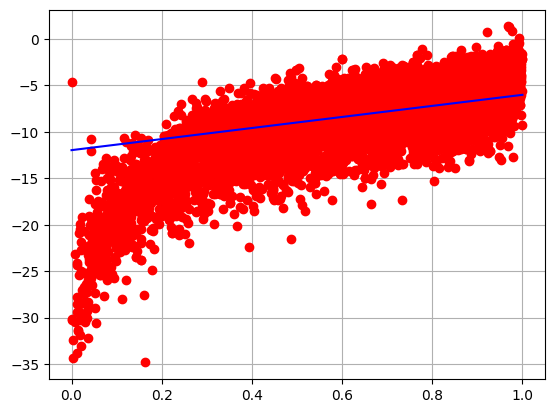

In [39]:
fig=plt.figure()
xv=np.linspace(0,1, 1000)
plt.grid()

plt.plot(xt,yt,'ro')          # data
#for i in range(len(ws)-1):
 #   plt.plot(xv, param[i][0]*xv+param[i][1], 'g')   # starting and intermediary lines
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')      # final line
plt.show()

In [44]:
X=np.array(df.iloc[:,[4,6,9,11,12,13]])
y=np.array(df.iloc[:,3])

In [45]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.astype(np.float32))
y_train=torch.from_numpy(y_trainN.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.astype(np.float32))
y_test=torch.from_numpy(y_testN.astype(np.float32)).reshape(-1,1)

In [46]:
n_samples, n_features = X_train.shape

In [75]:
model=nn.Linear(n_features, 1)

lr=0.00006
n_epoch=100000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)

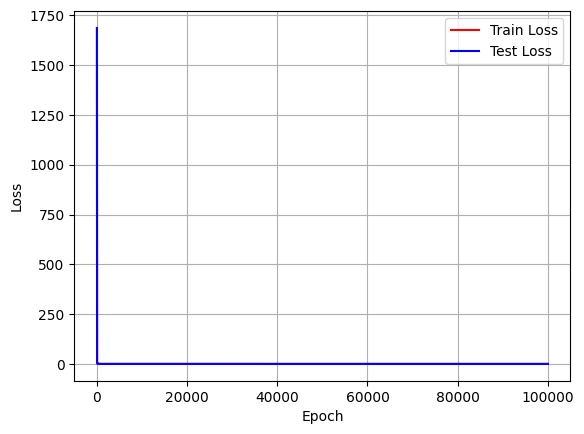

In [76]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [77]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: -0.09


In [78]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.30
